# Logfile check
Use this notebook for an in depth look at a selected data session from the VR acquisition system.
Can be used to look for weirdness in the data and debug the experimental setup.

In [1]:
import logreader as lr
from pathlib import Path
import matplotlib.pyplot as plt
import pickle
import tifffile
import glob
from tqdm import tqdm
import numpy as np

In [9]:
#PARAMETERS
animal = '441394_ribolla'
animal_num = animal.split('_')[0]
date = '20230412'


session_path = Path(f'/ceph/imaging1/arie/{animal}/{date}_{animal_num}')
save_path =  Path(f'/ceph/imaging1/davide/2p_data/{animal}/{date}')

tif_file = glob.glob(str(session_path)+'/*.tif')[0]
log_file = glob.glob(str(session_path)+'/*.b64')[0]

print(log_file)
print(tif_file)

/ceph/imaging1/arie/441394_ribolla/20230412_441394/20230412-095850_353.b64
/ceph/imaging1/arie/441394_ribolla/20230412_441394/20230412_441394_00001.tif


# Decode session log and tif header

In [10]:
decoded_log = lr.create_bp_structure(log_file)

Decoding log file


  0%|          | 0/1365924 [00:00<?, ?it/s]

In [45]:
tif_header = lr.read_tif_header(tif_file)

0it [00:00, ?it/s]

In [33]:
frames = tif_header['frame_ts']
i2c_data =tif_header['i2c_data']

In [11]:
digital_in = decoded_log['digitalIn'].astype(int)
digital_out = decoded_log['digitalOut'].astype(int)
scanner_digital = digital_in[:,6]
log_times = decoded_log['startTS'].astype(float)
barcode = digital_out[:,4]

In [35]:
lr.compute_sync_shift(scanner_digital,log_times,frames)

82.76848785848

In [12]:
tm = lr.build_trial_matrix(digital_in,digital_out)

In [13]:
tm

,env_onset,tunnel1_onset,reward_zone_onset,tunnel2_onset,tunnel2_offset,trial_duration,env_label,sound_onset,sound_offset,sound_presented,reward_onset,reward_offset
0,0.0,50658,53576,79380,81541.0,NaN,1,NaN,NaN,False,54256,56273
1,81541.0,89293,91834,105453,107834.0,NaN,1,NaN,NaN,False,93054,95060
2,107834.0,115345,117787,146503,149747.0,NaN,2,109836.0,112752.0,True,118929,120938
3,149747.0,156242,158962,179704,182337.0,NaN,3,151702.0,154702.0,True,159502,161517
4,182337.0,193470,196151,219033,222034.0,NaN,1,186661.0,189675.0,True,198056,200065
5,222034.0,236324,239044,257345,259524.0,NaN,2,NaN,NaN,False,240015,242031
6,259524.0,267780,270385,335202,338616.0,NaN,3,261008.0,264021.0,True,270961,272991
7,338616.0,347565,357260,381541,383838.0,NaN,2,340948.0,343968.0,True,358311,360327
8,383838.0,393451,402117,423495,427127.0,NaN,1,NaN,NaN,False,403501,405524
9,427127.0,433882,436439,478496,480867.0,NaN,3,428915.0,431922.0,True,438687,440706


# Arrange and plot chanel data

In [7]:
for k in decoded_log.keys():
    print(f'{k}: {decoded_log[k].shape}')

analog: (1769292, 8)
digitalIn: (1769292, 16)
digitalOut: (1769292, 8)
startTS: (1769292,)
transmitTS: (1769292,)
longVar: (1769292, 8)
packetNums: (1769292,)


In [38]:
labels_in = ['empty','empty','wheelA','wheelB','wheelC','IR_camera','scanner','sound','unknown','reward_zone','environment1',
             'environment2','environment3_broken','tunnel1','tunnel2','environment3']
labels_out = ['valve','empty','IR_lED_sync','empty','barcode','IR_LED','lick','empty']

In [34]:
digital_in = decoded_log['digitalIn'].astype(int)
digital_out = decoded_log['digitalOut'].astype(int)
digital_scan_signal = digital_in[:,6]
log_times = decoded_log['startTS']
#sync_times = lr.compute_sync_times(digital_scan_signal,log_times,frames)

37


ValueError: operands could not be broadcast together with shapes (35,) (37,) 

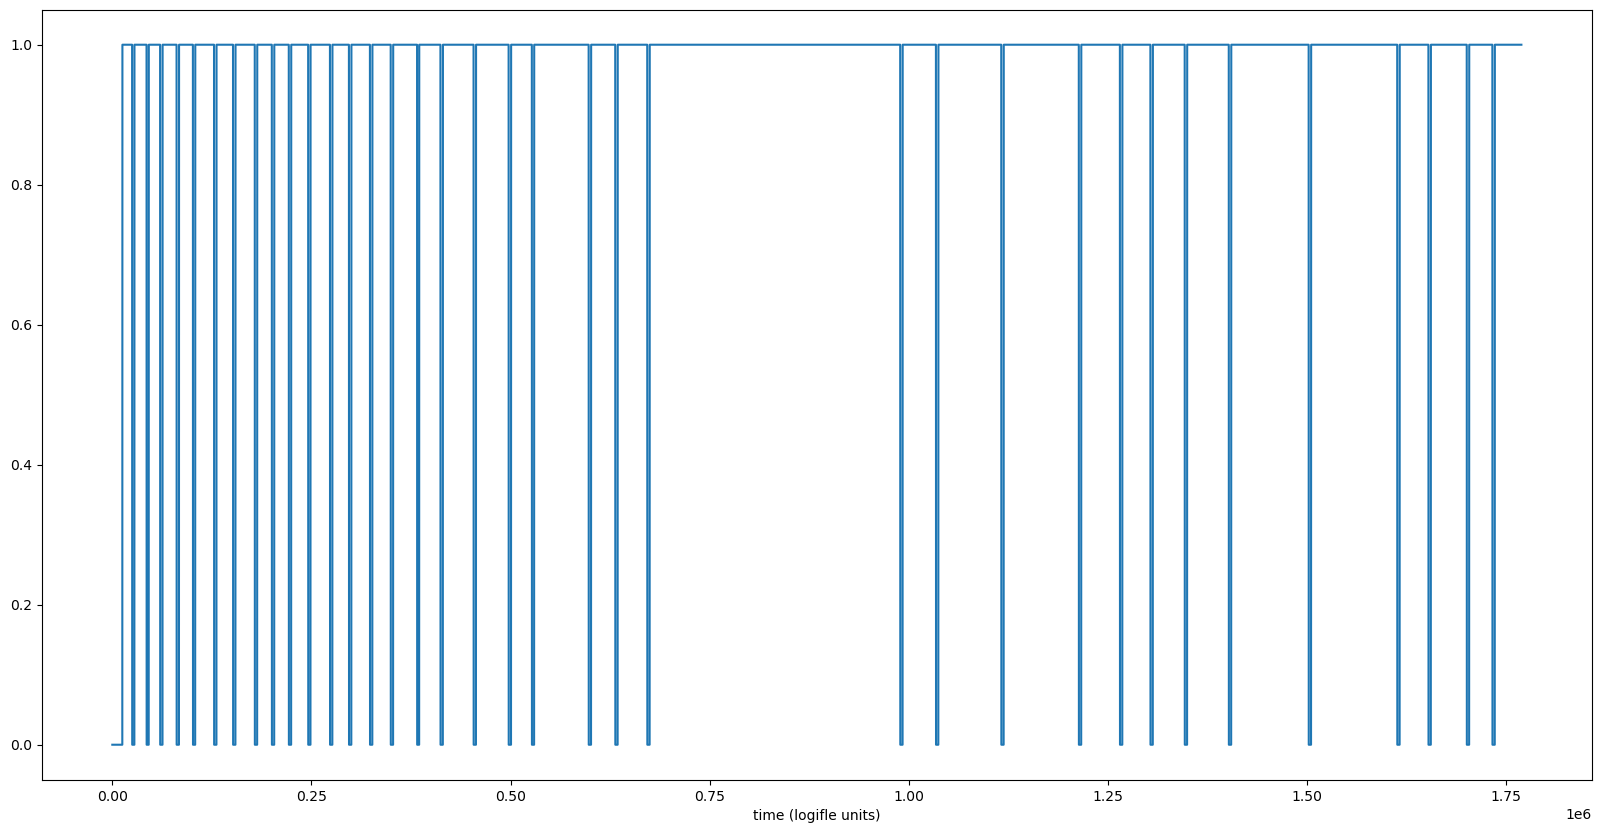

In [8]:
channel = 7
plt.figure(figsize=(20,10))
x = digital_in[:,channel]
plt.plot(x)
onsets = lr.compute_onsets(x)
offsets = lr.compute_offsets(x)
#plt.eventplot(onsets,color='r')
print(len(onsets))
plt.xlabel('time (logifle units)')
print(offsets[1:]-onsets)
#plt.title(f'Average time on {np.mean(digital_in[34000:34010,channel]):.3f}')

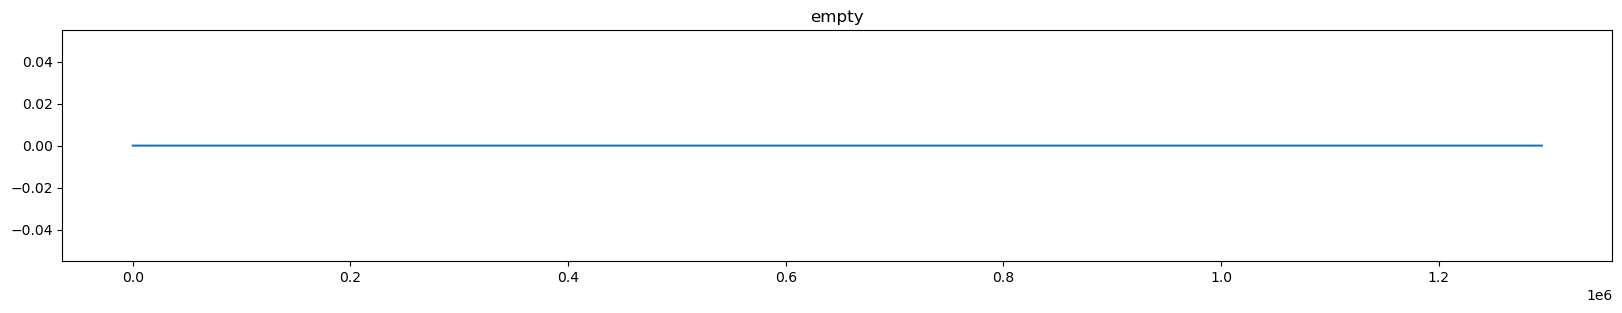

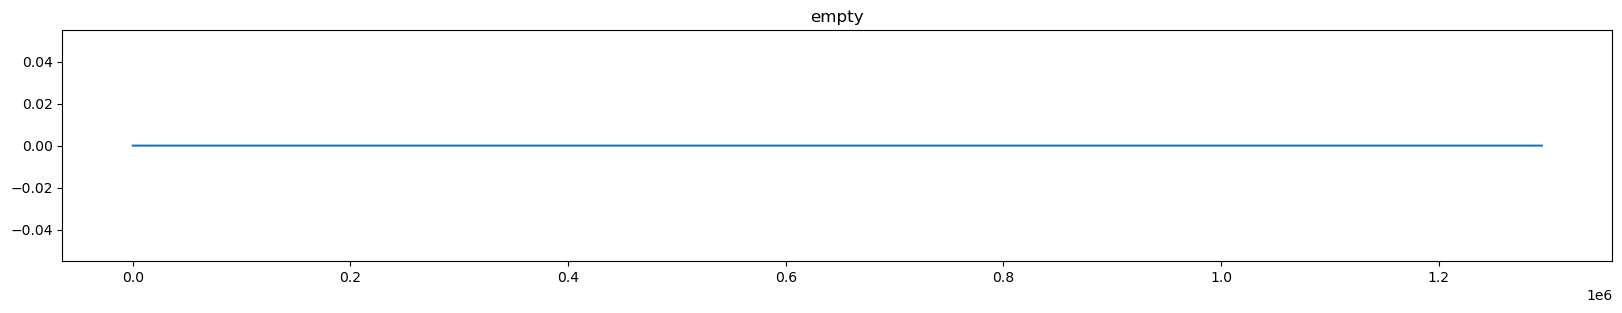

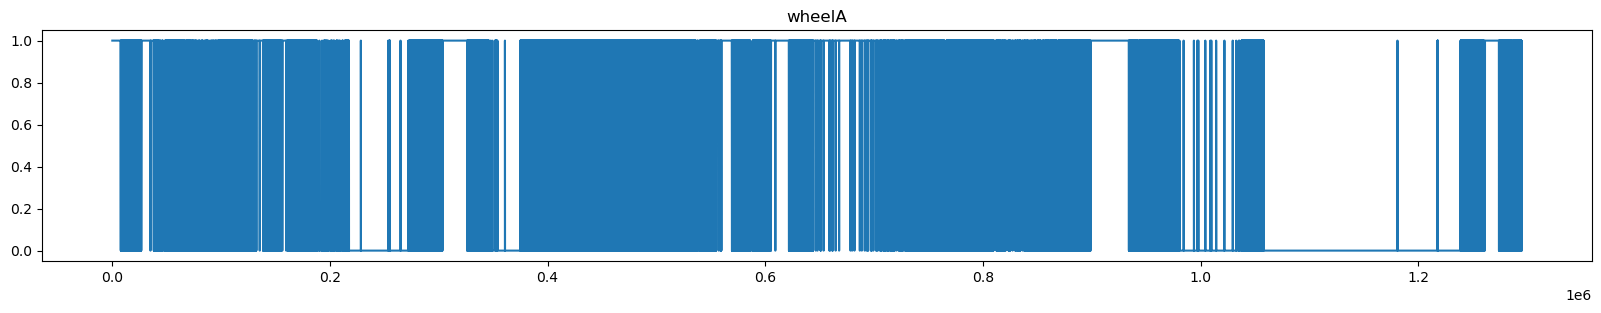

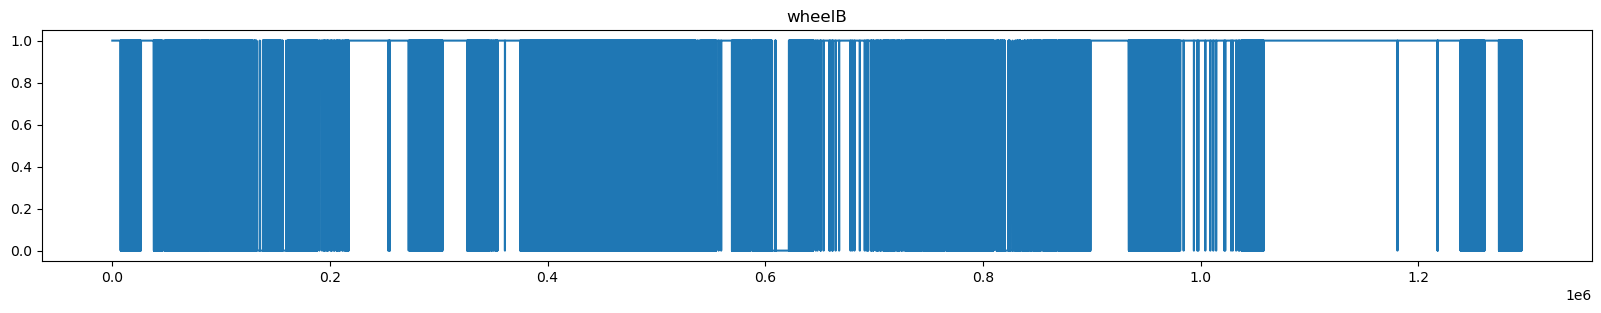

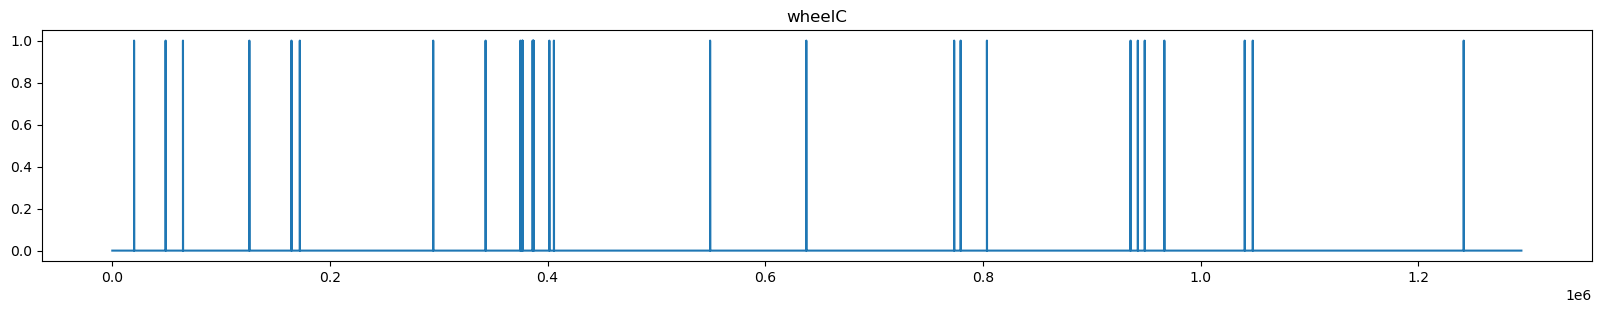

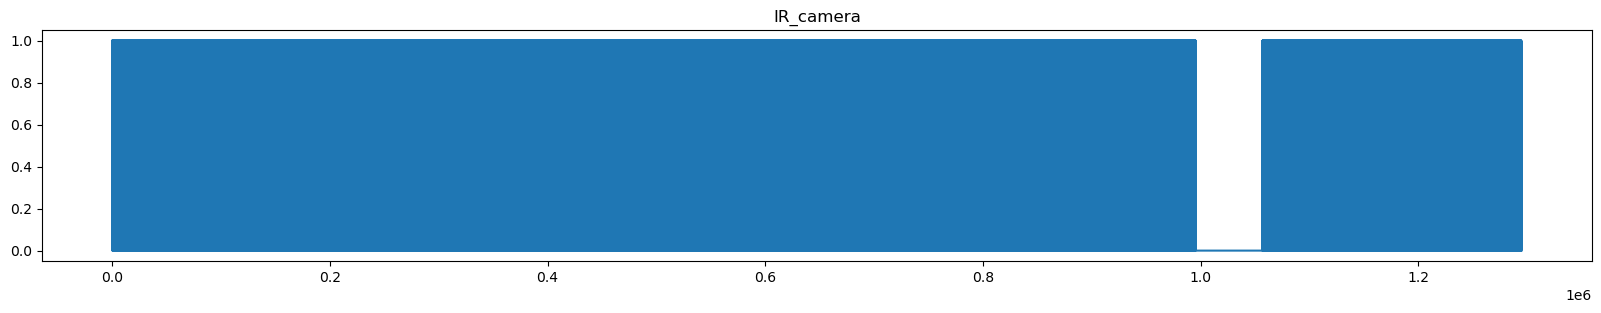

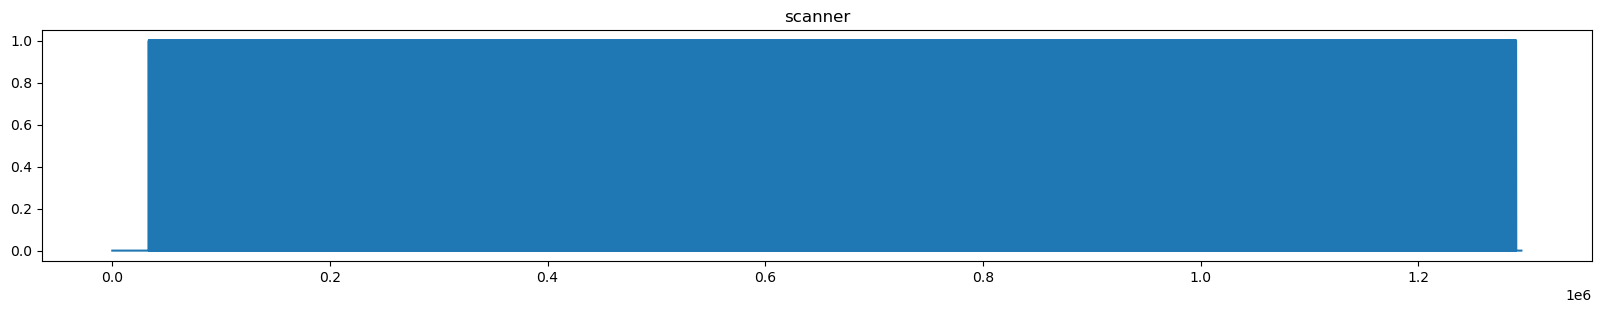

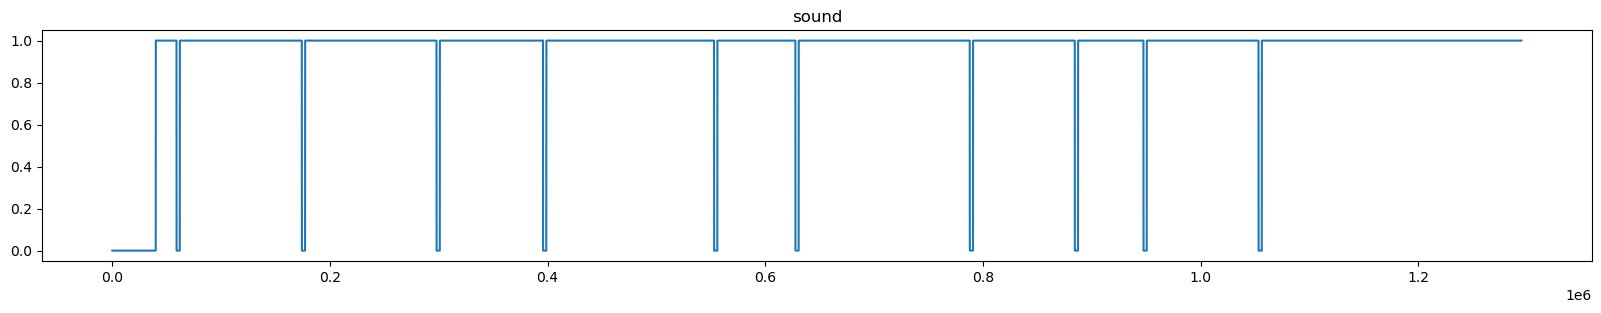

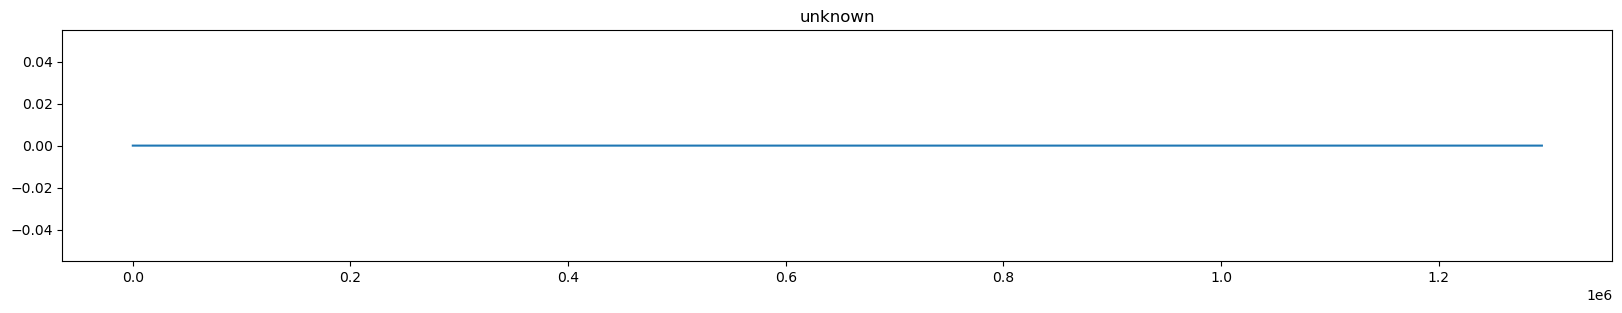

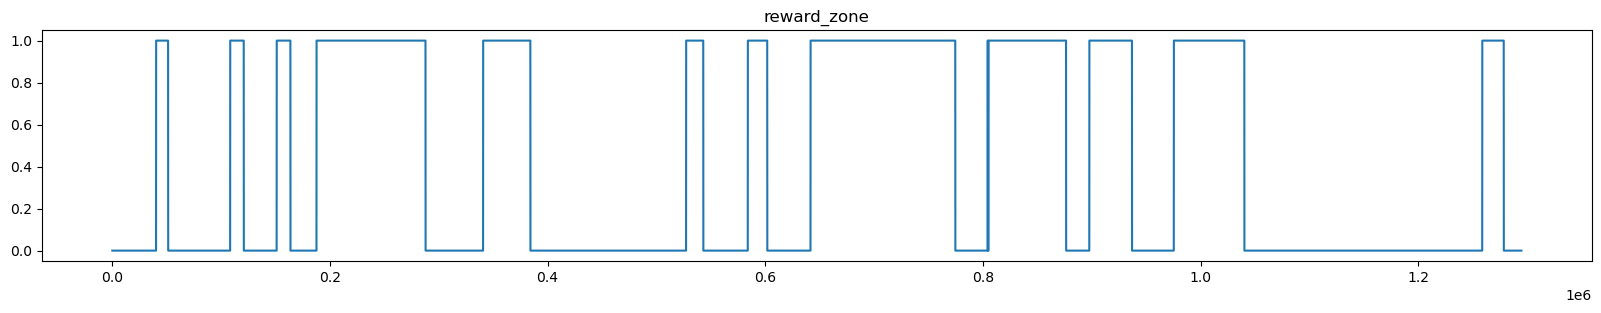

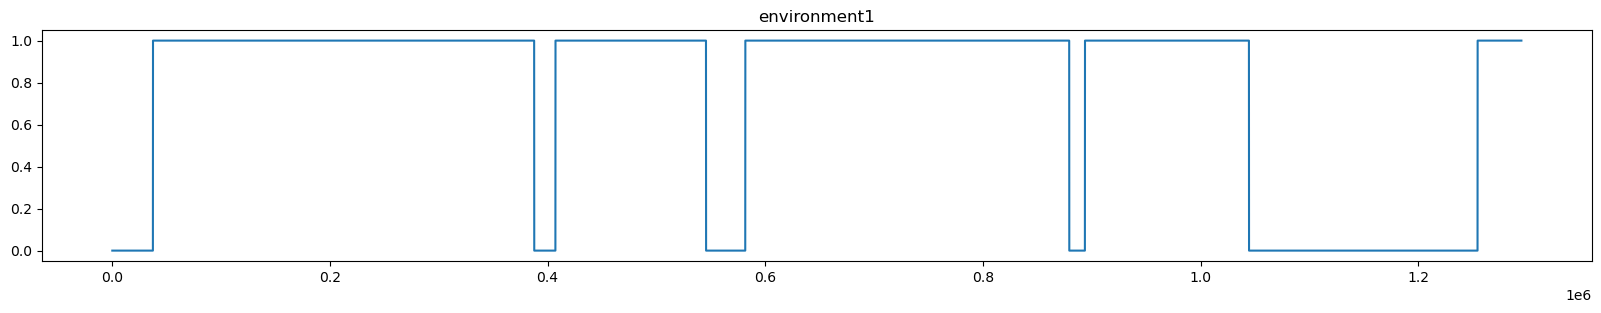

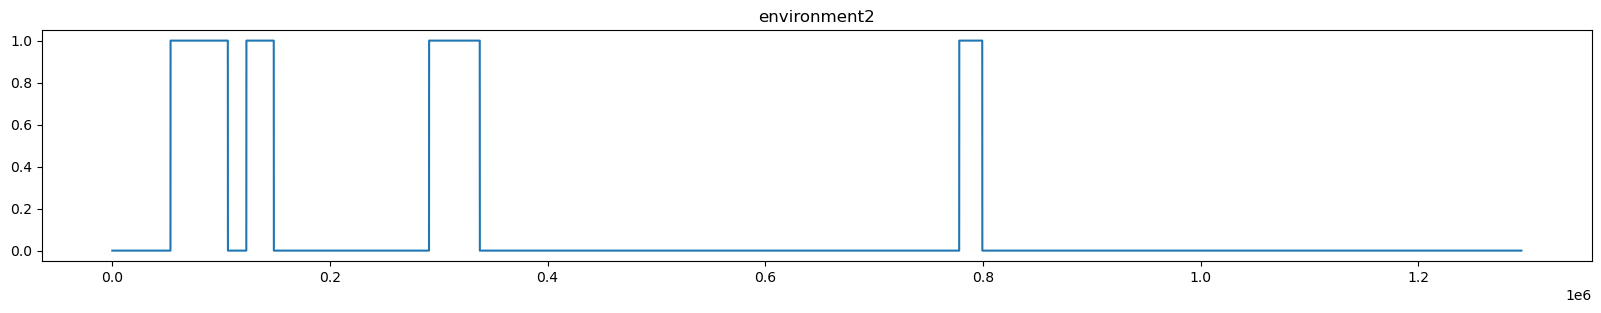

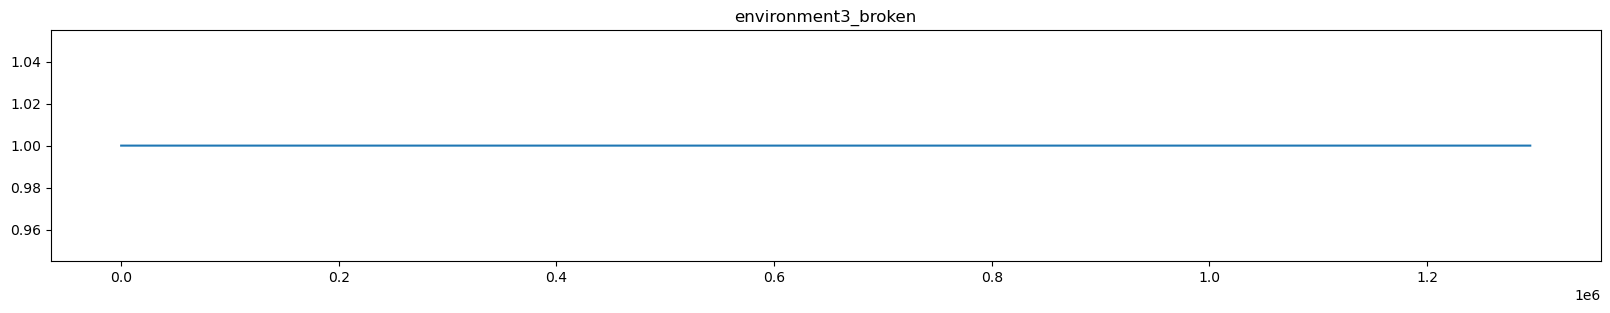

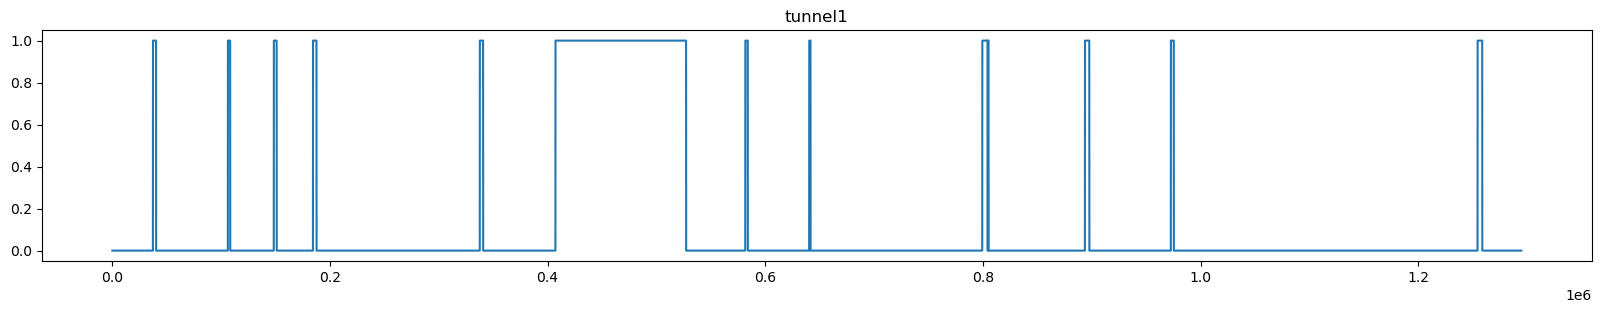

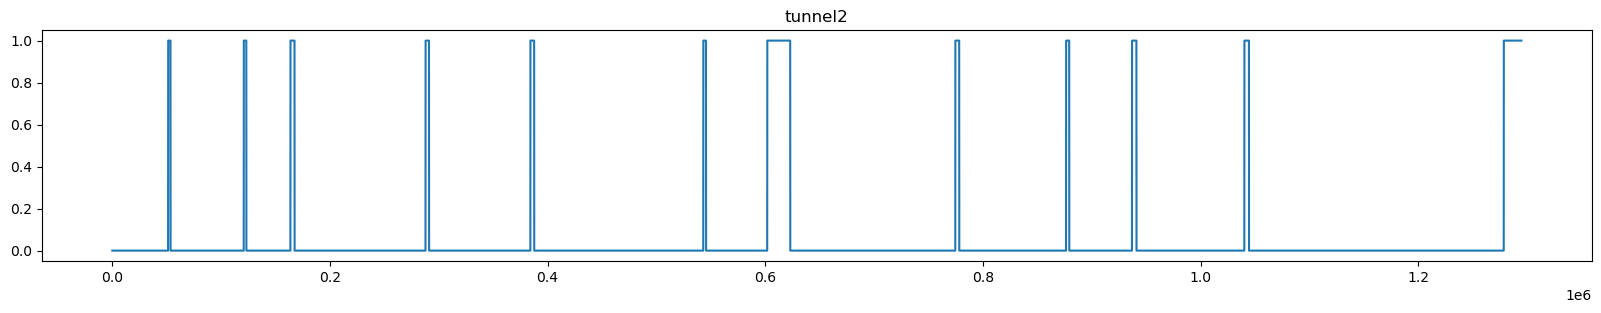

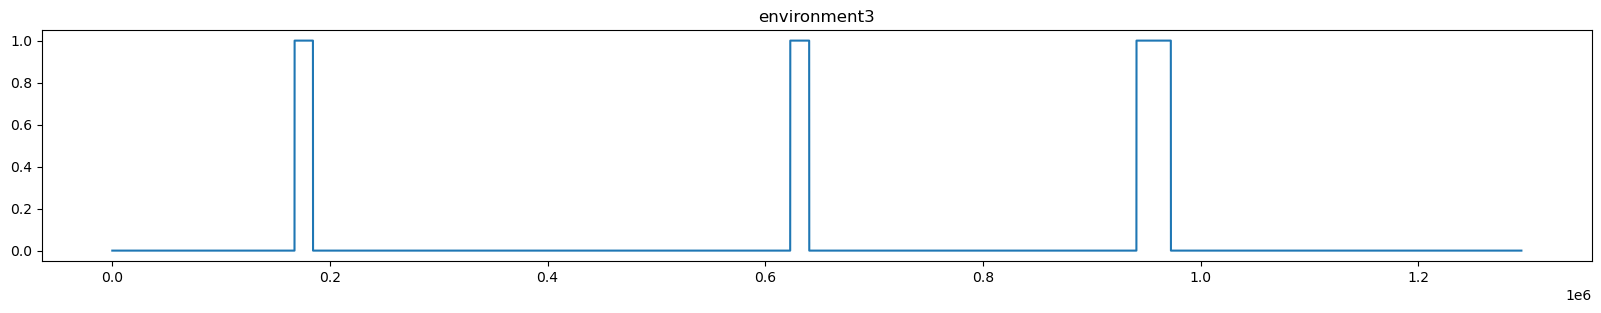

In [41]:
# plot all channels
for i,l in enumerate(labels_in):
    plt.figure(figsize=(20,3))
    plt.title(f'{l}')
    plt.plot(digital_in[:,i])